<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MULTI" data-toc-modified-id="MULTI-1">MULTI</a></span><ul class="toc-item"><li><span><a href="#Критерий" data-toc-modified-id="Критерий-1.1">Критерий</a></span></li></ul></li><li><span><a href="#ITERATION" data-toc-modified-id="ITERATION-2">ITERATION</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
multi_root = 'KEV_res_no_taxes/multi/'# mu =0.0/'
# iter_root = 'KEV_res/iter/' #mu =0.0/'

flows = 'flows/'
corrs = 'corr_matrix/'
times = 'times/'
subgs = 'subg/'
inverses = 'inverse_func/'

In [3]:
n =  114
mu = 0.25

f = []
c = []
t = []
f_n_k = []
c_n_k = []
t_n_k = []
inv = []
sbg = []

flow_n = np.loadtxt(multi_root + flows + str(n-1) + '_flows.txt', 
                          delimiter = ' ')
time_n = np.loadtxt(multi_root + times + str(n-1) + '_time.txt', 
                          delimiter = ' ')
c_n = np.loadtxt(multi_root + corrs + str(n-1) + '_corr_matrix.txt', 
                          delimiter = ' ')
subg_n = np.loadtxt(multi_root + subgs + str(n-1) + '_nabla_func.txt', 
                          delimiter = ' ')
inverse_n = np.loadtxt(multi_root + inverses + str(n-1) + '_inverse_func.txt', 
                          delimiter = ' ')

#### MULTI

In [4]:
for ms_i in range(n):
    if ms_i == 0:
        flow_0 = np.loadtxt(multi_root + flows + str(ms_i) + '_flows.txt', 
                          delimiter = ' ')
        time_0 = np.loadtxt(multi_root + times + str(ms_i) + '_time.txt', 
                          delimiter = ' ')
        corr_0 = np.loadtxt(multi_root + corrs + str(ms_i) + '_corr_matrix.txt', 
                          delimiter = ' ')
        subg_0 = np.loadtxt(multi_root + subgs + str(ms_i) + '_nabla_func.txt', 
                          delimiter = ' ')
        inverse_0 = np.loadtxt(multi_root + inverses + str(ms_i) + '_inverse_func.txt', 
                          delimiter = ' ')
        
        f_n_k.append(np.linalg.norm(flow_n - flow_0))
        t_n_k.append(np.linalg.norm(time_n - time_0))
        c_n_k.append(np.linalg.norm(c_n - corr_0))
    else:
        flow = np.loadtxt(multi_root + flows + str(ms_i) + '_flows.txt', 
                          delimiter = ' ')
        time = np.loadtxt(multi_root + times + str(ms_i) + '_time.txt', 
                          delimiter = ' ')
        corr = np.loadtxt(multi_root + corrs + str(ms_i) + '_corr_matrix.txt', 
                          delimiter = ' ')
        subg = np.loadtxt(multi_root + subgs + str(ms_i) + '_nabla_func.txt', 
                          delimiter = ' ')
        inverse = np.loadtxt(multi_root + inverses + str(ms_i) + '_inverse_func.txt', 
                          delimiter = ' ')
        
        inv.append(inverse)
        sbg.append(subg)
        t.append(time)
        
        f.append(np.linalg.norm(flow - flow_0))
#         t.append(np.linalg.norm(time - time_0))
        c.append(np.linalg.norm(corr - corr_0))
        
        flow_0 = flow
        time_0 = time
        corr_0 = corr
        
        f_n_k.append(np.linalg.norm(flow_n - flow_0))
        t_n_k.append(np.linalg.norm(time_n - time_0))
        c_n_k.append(np.linalg.norm(c_n - corr_0))

In [5]:
np.shape(t[0])

(76,)

##### Критерий

1) $\| \nabla f(t^k) \|_2 * 2\|t^0 - t^k\|_2 $

2) $2\|t^0 - t^k\|_2$

можно брать $5\|t^0\|_2$ вместо выражения 2)

In [6]:
t_0 = np.loadtxt(multi_root + times + '0_time.txt', 
                          delimiter = ' ')
def criteria(inv, sbg, t, t_0):
    f = sbg + inv
#     print(t, t_0)
    return np.linalg.norm(f)*np.linalg.norm(2*t_0)

In [7]:
crit = []
for i in range(len(inv)):
    crit.append(criteria(inv[i], sbg[i], t[i], t_0))

In [8]:
crit[0]

13482675.920103105

In [9]:
n

114

In [10]:
flow_n
flow_n_orig = np.loadtxt(multi_root + flows + str(n-1) + '_flows.txt', 
                          delimiter = ' ')

In [11]:
flow_n_orig - flow_n

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
flow_n

array([ 5.94272587e+03,  1.08539717e+04,  6.09614029e+03,  2.63513516e+03,
        1.07005573e+04,  6.23575137e+03,  1.06862098e+04,  6.19069349e+03,
        6.95251666e+03,  1.00370360e+02,  7.10782915e+03,  2.63532820e+03,
        3.72295996e-08,  2.78854958e+03,  2.79064024e+03,  2.02075952e+03,
        6.15652618e+02,  1.19037074e+04,  2.32948598e+03,  5.32450613e-13,
        1.37136218e-16,  3.06926164e+02,  4.54408452e-04,  1.30047448e-05,
        1.31141323e+02,  2.31141798e+02,  2.19408846e-06,  6.31420421e+03,
        1.03193869e-07,  4.72672698e-20, -0.00000000e+00,  3.58648728e-18,
        3.68340105e-01,  2.01057080e-03,  1.05778533e+04, -0.00000000e+00,
        1.45848946e+04,  1.45761697e+04,  2.76315542e+02,  3.84880845e-07,
        2.40254342e+03,  1.39264662e-03,  6.31420471e+03,  2.39381674e+03,
        8.05033871e+03,  4.64163984e+03, -0.00000000e+00,  1.46195147e-14,
       -0.00000000e+00,  3.06926496e+02,  6.38039723e-15,  9.29904049e-12,
        1.90906431e+03,  

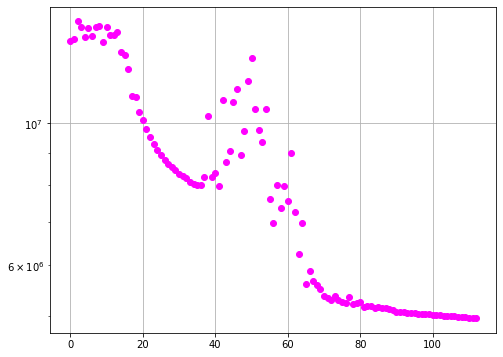

In [13]:
w = 8
h = 6
plt.figure(figsize=(w, h))
plt.plot(crit, 'o', color='magenta')
plt.yscale('log')
plt.grid()

In [14]:
len(crit), len(crit[5:])

(113, 108)

/home/mikhail/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if __name__ == '__main__':
/home/mikhail/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if __name__ == '__main__':


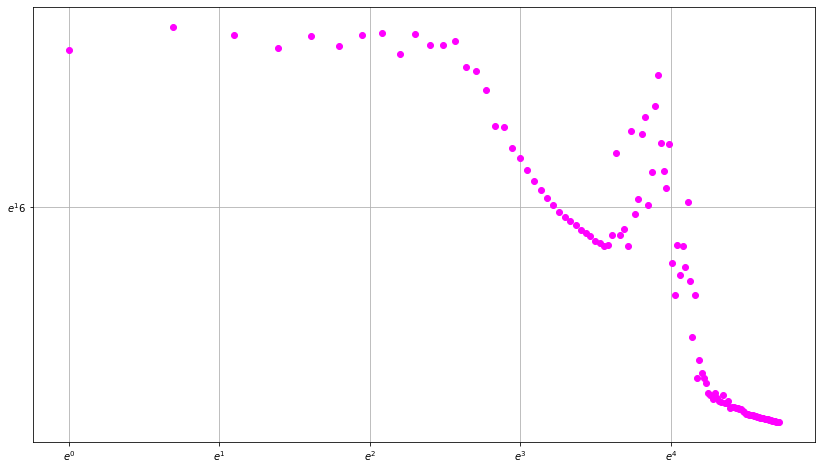

<Figure size 432x288 with 0 Axes>

In [15]:
w = 14
h = 8
# # plt.figure(figsize=(w, h))
# # plt.loglog(crit, 'o', color='magenta')
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(w, h))

ax.loglog(crit, 'o', color='magenta', basex=np.e, basey=np.e)

def ticks(y, pos):
    return r'$e^{:.0f}$'.format(np.log(y))

ax.xaxis.set_major_formatter(mtick.FuncFormatter(ticks))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))

# plt.yticks(np.arange(1, 2*10**10, step=0.1*np.e**10))

# plt.ylim(np.e*10**6.7, np.e*10**7.01)
plt.grid()
plt.show()
plt.savefig(multi_root + 'crit_log_log.png')
np.savetxt(multi_root + 'crit.txt', crit, delimiter=' ')

/home/mikhail/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.
/home/mikhail/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.
/home/mikhail/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  """
/home/mikhail/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been rename

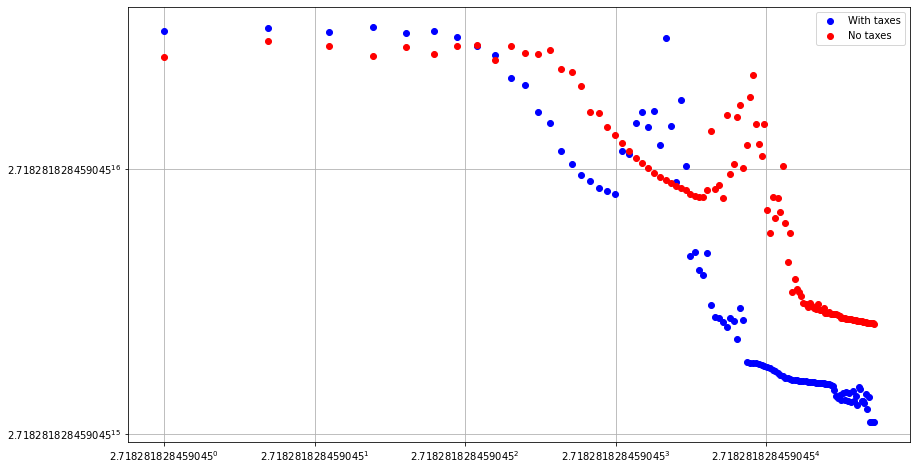

In [16]:
data_taxes = np.loadtxt('KEV_res_taxes/multi/' + 'crit.txt')
data_no_taxes = np.loadtxt('KEV_res_no_taxes/multi/' + 'crit.txt')
fig, ax = plt.subplots(figsize=(w, h))
ax.loglog(data_taxes, 'o', color='b', basex=np.e, basey=np.e, label='With taxes')
ax.loglog(data_no_taxes, 'o', color='r', basex=np.e, basey=np.e, label='No taxes')
plt.grid()
plt.legend()
plt.savefig('crit_log_log_compare.png')

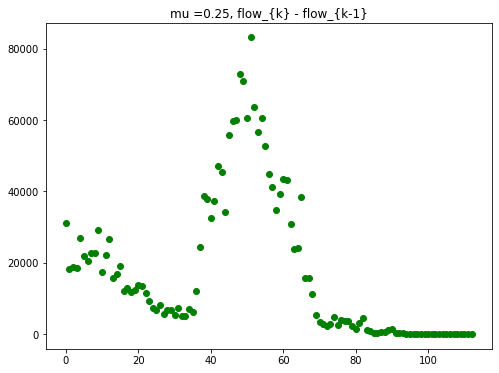

In [17]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 50)
# plt.xlim(0, 250)
plt.plot(f, 'o', color='green')
plt.title('mu =' + str(mu) + ', ' + 'flow_{k} - flow_{k-1}')
plt.savefig(multi_root + 'flow_{k} - flow_{k-1}.png')
np.savetxt(multi_root + 'f.txt', f, delimiter=' ')

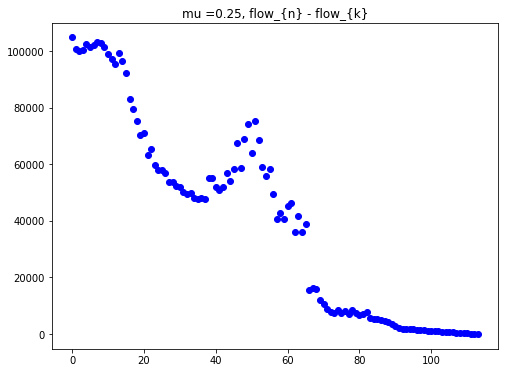

In [18]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.xlim(0, 2050)
plt.plot(f_n_k, 'o', color='blue')
plt.title('mu =' + str(mu) + ', ' + 'flow_{n} - flow_{k}')
plt.savefig(multi_root + 'flow_{n} - flow_{k}.png')
np.savetxt(multi_root + 'f_n_k.txt', f_n_k, delimiter=' ')

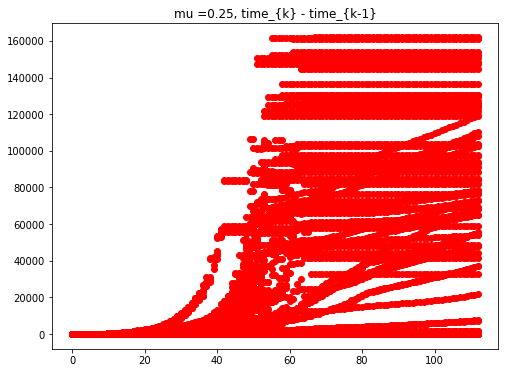

In [19]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.xlim(-500, 4999)
# plt.ylim(0.01, 0.05)
plt.plot(t, 'o', color='red')
plt.title('mu =' + str(mu) + ', ' + 'time_{k} - time_{k-1}')
plt.savefig(multi_root + 'time_{k} - time_{k-1}.png')
np.savetxt(multi_root + 't.txt', t, delimiter=' ')

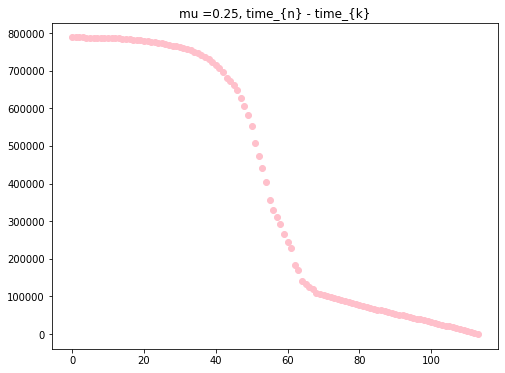

In [20]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 1)
plt.plot(t_n_k, 'o', color='pink')
plt.title('mu =' + str(mu) + ', ' + 'time_{n} - time_{k}')
plt.savefig(multi_root + 'time_{n} - time_{k}.png')
np.savetxt(multi_root + 't_n_k.txt', t_n_k, delimiter=' ')

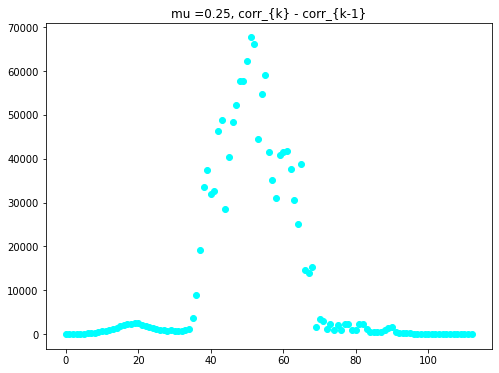

In [21]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 2)
# plt.ylim(67000, 62500)
plt.plot(c, 'o', color='cyan')
plt.title('mu =' + str(mu) + ', ' + 'corr_{k} - corr_{k-1}')
plt.savefig(multi_root + 'corr_{k} - corr_{k-1}.png')
np.savetxt(multi_root + 'c.txt', c, delimiter=' ')

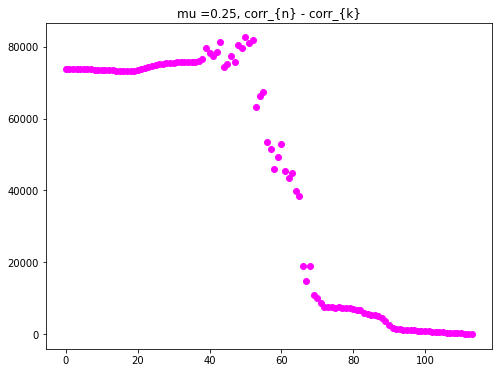

In [22]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 200)
plt.plot(c_n_k, 'o', color='magenta')
plt.title('mu =' + str(mu) + ', ' + 'corr_{n} - corr_{k}')
plt.savefig(multi_root + 'corr_{n} - corr_{k}.png')
np.savetxt(multi_root + 'c_n_k.txt', c_n_k, delimiter=' ')

#### ITERATION

In [23]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

multi_root = 'KEV_res/multi/'# mu =0.0/'
iter_root = 'KEV_res/iter/' #mu =0.0/'

flows = 'flows/'
corrs = 'corr_matrix/'
times = 'times/'

In [24]:
n = 114
mu = 0.25

f = []
c = []
t = []
f_n_k = []
c_n_k = []
t_n_k = []

flow_n = np.loadtxt(iter_root + flows + str(n-1) + '_flows.txt', 
                          delimiter = ' ')
time_n = np.loadtxt(iter_root + times + str(n-1) + '_time.txt', 
                          delimiter = ' ')
corr_n = np.loadtxt(iter_root + corrs + str(n-1) + '_corr_matrix.txt', 
                          delimiter = ' ')

for ms_i in range(0, n):
    if ms_i == 0:
        flow_0 = np.loadtxt(iter_root + flows + str(ms_i) + '_flows.txt', 
                          delimiter = ' ')
        time_0 = np.loadtxt(iter_root + times + str(ms_i) + '_time.txt', 
                          delimiter = ' ')
        corr_0 = np.loadtxt(iter_root + corrs + str(ms_i) + '_corr_matrix.txt', 
                          delimiter = ' ')
        
        f_n_k.append(np.linalg.norm(flow_n - flow_0))
        t_n_k.append(np.linalg.norm(time_n - time_0))
        c_n_k.append(np.linalg.norm(corr_n - corr_0))
    else:
        flow = np.loadtxt(iter_root + flows + str(ms_i) + '_flows.txt', 
                          delimiter = ' ')
        time = np.loadtxt(iter_root + times + str(ms_i) + '_time.txt', 
                          delimiter = ' ')
        corr = np.loadtxt(iter_root + corrs + str(ms_i) + '_corr_matrix.txt', 
                          delimiter = ' ')
        
        f.append(np.linalg.norm(flow - flow_0))
        t.append(np.linalg.norm(time - time_0))
        c.append(np.linalg.norm(corr - corr_0))
        
        flow_0 = flow
        time_0 = time
        
        f_n_k.append(np.linalg.norm(flow_n - flow))
        t_n_k.append(np.linalg.norm(time_n - time))
        c_n_k.append(np.linalg.norm(corr_n - corr))

OSError: KEV_res/iter/flows/113_flows.txt not found.

In [ ]:
t, f

In [ ]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(4000, 6000)
plt.plot(f, 'o', color='green')
plt.title('mu =' + str(mu) + ', ' 'flow_{k} - flow_{k-1}')
plt.savefig(iter_root + 'flow_{k} - flow_{k-1}.png')

In [ ]:
w = 8
h = 6
plt.figure(figsize=(w, h))
plt.ylim(0, 65000)
plt.plot(f_n_k, 'o', color='blue')
plt.title('mu =' + str(mu) + ', ' 'flow_{n} - flow_{k}')
plt.savefig(iter_root + 'flow_{n} - flow_{k}.png')

In [ ]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.xlim(999)
# plt.ylim(0, 35000)
plt.plot(t, 'o', color='red')
plt.title('mu =' + str(mu) + ', ' 'time_{k} - time_{k-1}')
plt.savefig(iter_root + 'time_{k} - time_{k-1}.png')

In [ ]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
plt.plot(t_n_k, 'o', color='pink')
plt.title('mu =' + str(mu) + ', ' 'time_{n} - time_{k}')
plt.savefig(iter_root + 'time_{n} - time_{k}.png')

In [ ]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 2)
# plt.ylim(67000, 62500)
plt.plot(c, 'o', color='cyan')
plt.title('mu =' + str(mu) + ', ' + 'corr_{k} - corr_{k-1}')
plt.savefig(iter_root + 'corr_{k} - corr_{k-1}.png')

In [ ]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 200)
plt.plot(c_n_k, 'o', color='magenta')
plt.title('mu =' + str(mu) + ', ' + 'corr_{n} - corr_{k}')
plt.savefig(iter_root + 'corr_{n} - corr_{k}.png')

# Compare

In [30]:
taxes_root = 'KEV_res_taxes/multi/'
no_taxes_root = 'KEV_res_no_taxes/multi/'
compare_root = 'RES_compare/'

In [31]:
def compare_vals(compare_val):
    w = 8
    h = 6
    plt.figure(figsize=(w, h))
    data_taxes = np.loadtxt(taxes_root + compare_val + '.txt')
    data_no_taxes = np.loadtxt(no_taxes_root + compare_val +'.txt')
    plt.plot(data_taxes, label="With taxes")
    plt.plot(data_no_taxes, label="No taxes")
    plt.grid()
    plt.legend()
    plt.savefig(compare_root + compare_val + '.png')

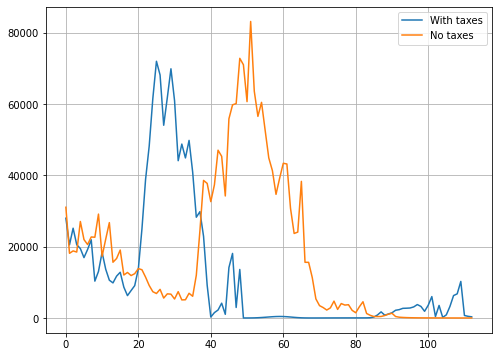

In [32]:
compare_vals('f')

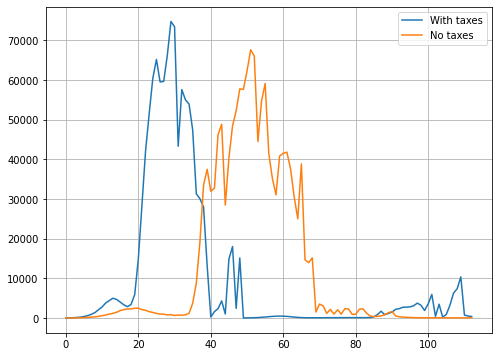

In [33]:
compare_vals('c')

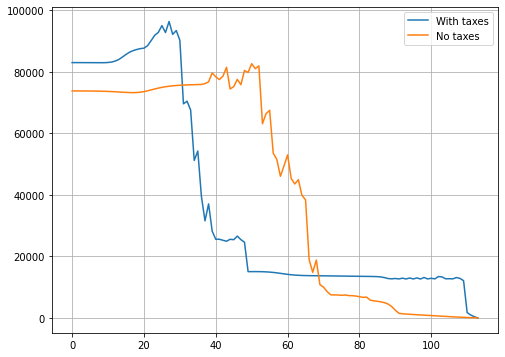

In [34]:
compare_vals('c_n_k')

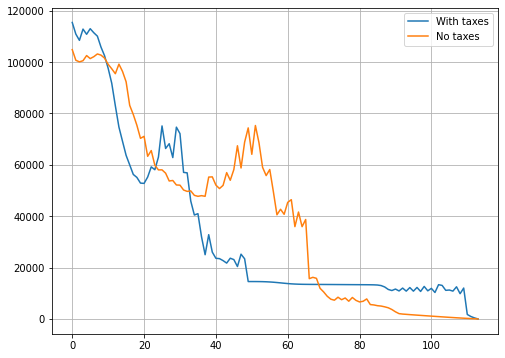

In [35]:
compare_vals('f_n_k')

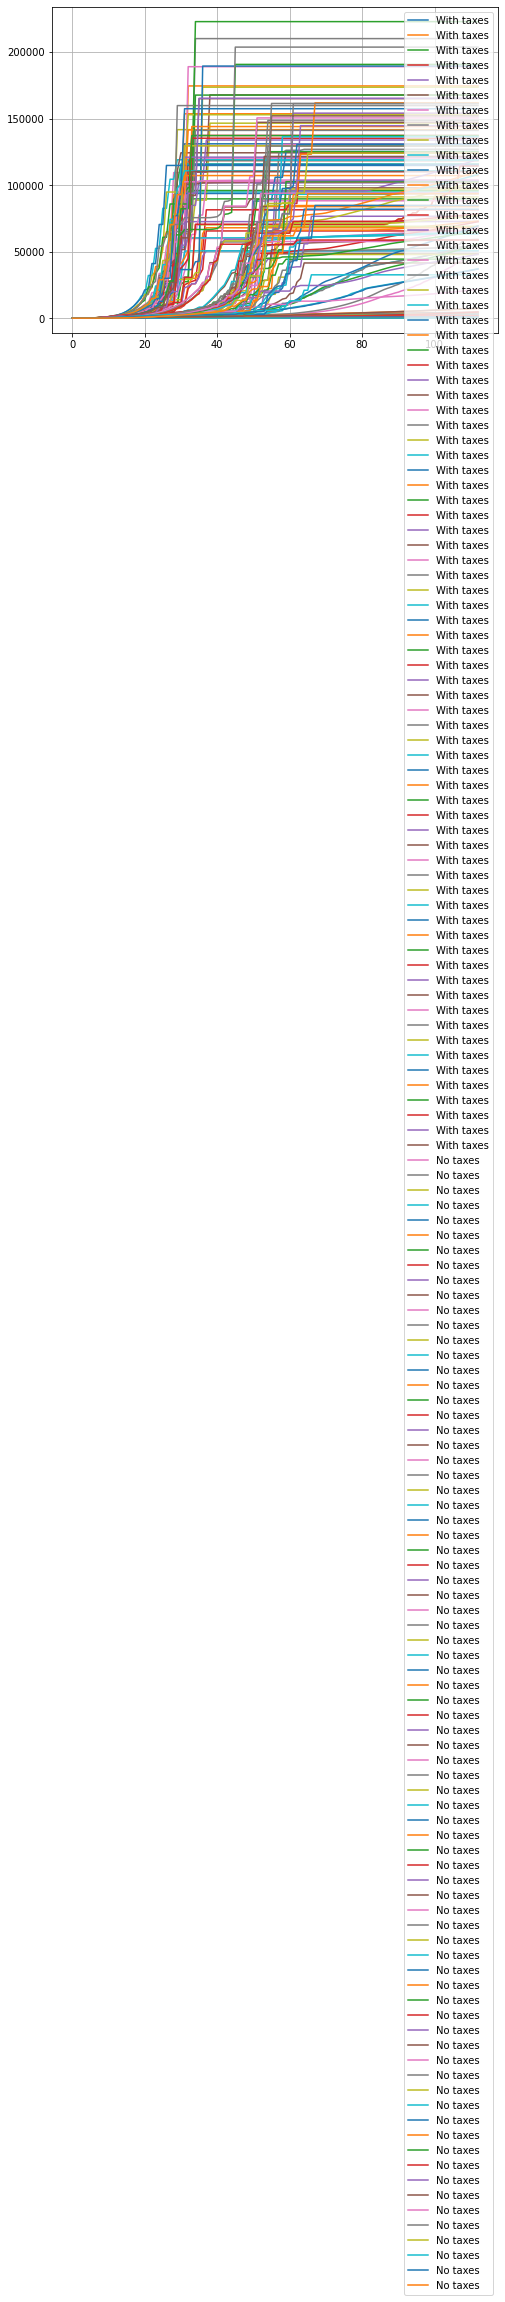

In [36]:
compare_vals('t')

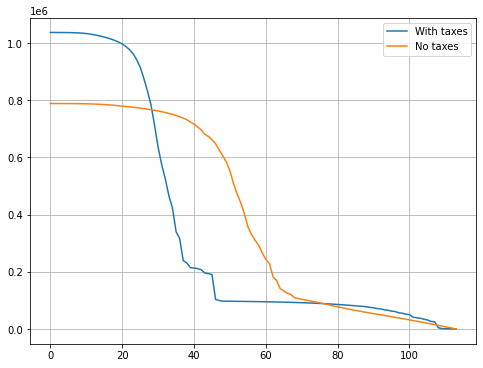

In [37]:
compare_vals('t_n_k')

In [ ]:
compare_vals('f')